<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/ML/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd

In [54]:
import shutil
shutil.move("/moses-sources.csv", "/content/drive/My Drive/Colab Datasets/moses-sources.csv")
shutil.move("/abraham-sources.csv", "/content/drive/My Drive/Colab Datasets/abraham-sources.csv")

'/content/drive/My Drive/Colab Datasets/abraham-sources.csv'

In [0]:
prayer_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/prayer-sources.csv', 
                        encoding="latin-1"
                        # encoding="utf-8"
                        )

prayer_df['topic'] = 'prayer'

not_prayer_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/not-prayer-sources.csv', 
# not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            encoding="latin-1"
                              # encoding="utf-8"
                            )
not_prayer_df['topic'] = 'not_prayer'
moses_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/moses-sources.csv', 
# not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            encoding="latin-1"
                              # encoding="utf-8"
                            )
moses_df['topic'] = 'moses'
abraham_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/abraham-sources.csv', 
# not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            encoding="latin-1"
                              # encoding="utf-8"
                            )
abraham_df['topic'] = 'abraham'
big_df = pd.concat([
                    prayer_df,
                    not_prayer_df,
                    moses_df,
                    abraham_df,
                    ])
# big_df = pd.read_csv('/content/drive/My Drive/Colab Datasets/yishai_data.csv',
#                             # encoding="latin-1"
#                               encoding="utf-8"
# )

In [74]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3485 entries, 0 to 646
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ref     3485 non-null   object
 1   En      2009 non-null   object
 2   He      3475 non-null   object
 3   topic   3485 non-null   object
 4   Topics  1051 non-null   object
dtypes: object(5)
memory usage: 163.4+ KB


In [75]:
print(big_df.info)

<bound method DataFrame.info of                                                    Ref  ... Topics
0                                    Berakhot 5b:25-26  ...    NaN
1                                      Berakhot 6a:7-9  ...    NaN
2                                      Berakhot 6b:2-9  ...    NaN
3                                        Berakhot 7a:4  ...    NaN
4                                      Berakhot 8a:1-7  ...    NaN
..                                                 ...  ...    ...
642                        Pirkei DeRabbi Eliezer 32:8  ...    NaN
643  Mishneh Torah, Foreign Worship and Customs of ...  ...    NaN
644  Mishneh Torah, Foreign Worship and Customs of ...  ...    NaN
645              Mishneh Torah, Gifts to the Poor 10:1  ...    NaN
646                       Mishneh Torah, Mourning 14:2  ...    NaN

[3485 rows x 5 columns]>


In [76]:
big_df.shape

(3485, 5)

In [0]:
# small_df = big_df[:1000]
small_df = big_df

In [78]:
small_df.sample(3)

,Ref,En,He,topic,Topics
626,Exodus 9:7,"And Pharaoh sent, and, behold, there was not s...",×Ö·×Ö¼Ö´×©×Ö°×Ö·Ö£× ×¤Ö¼Ö·×¨Ö°×¢Ö¹Ö× ×...,moses,NaN
37,Sukkah 49b:6,Â§ Apropos the homiletic interpretations of th...,××¨×© ×¨×× ××× ×××ª×× (×©××¨ ××©×...,abraham,NaN
296,Avodah Zarah 14b:6,Â§ The mishna teaches that Rabbi Meir says: It...,"×¨""× ××××¨ ××£ ××§× ×××': ×""× ×¨×...",abraham,NaN


In [79]:
df = small_df[['En','topic']]
df['topic'].str.split()
df = df.join(df.pop('topic').str.get_dummies(' '))
df.head(3)
# df = small_df[['En','Topics']]
# df['Topics'].str.split()
# df = df.join(df.pop('Topics').str.get_dummies(' '))
# df.head(3)

,En,abraham,moses,not_prayer,prayer
0,Another of Abba Binyaminâs statements with r...,0,0,0,1
0,Another of Abba Binyaminâs statements with r...,0,0,1,0
0,Another of Abba Binyaminâs statements with r...,0,1,0,0


In [80]:
df.columns

Index(['En', 'abraham', 'moses', 'not_prayer', 'prayer'], dtype='object')

In [81]:

# df['Topics'] = df['Topics'].astype(str)

print("\nNulls before dropping:",df.isnull().sum()[0])
df.dropna(inplace=True)
print("Nulls after dropping:",df.isnull().sum()[0])

print("Before dropping duplicates",df.shape)
df.drop_duplicates(inplace=True)
print("After dropping duplicates",df.shape)

df['En'] = df['En'].astype(str)

# df = df.reset_index(drop=True)
# all_prayer_df.sample(5)# null_filter = df["En"] != ""
# df = df[null_filter]


Nulls before dropping: 5380
Nulls after dropping: 0
Before dropping duplicates (7029, 5)
After dropping duplicates (6853, 5)


In [94]:
# df["En"].iloc[[67]]
# df.iloc[[67]]
del df['not_prayer']
df.sample(5)

,En,abraham,moses,prayer
527,"10) ""and writing that is engraved"": I might th...",0,1,0
885,"Speak unto the children of Israel, and say unt...",0,0,1
148,The Gemara answers: He needed it due to the ru...,0,1,0
633,"And they took their journey from Elim, and all...",0,0,1
5,"8) ""These are the mitzvoth which the Lârd co...",0,1,0


In [0]:
# topics = df.columns
topics = list(df.columns)

# topics[:5]

# type(list(df.columns))
# topics[:5]

del topics[0]

# topics = ['prayer','moses','torah','god','egypt']

# topics[:10]
# type(topics )


In [0]:
hits = {topic:df[topic].sum() for topic in topics}
# hits['parah-adumah']

In [97]:
from collections import Counter
counter = Counter(hits)
for topic, num in counter.most_common(10):
     print( '%s: %i' % (topic, num))


prayer: 1953
moses: 1549
abraham: 1399


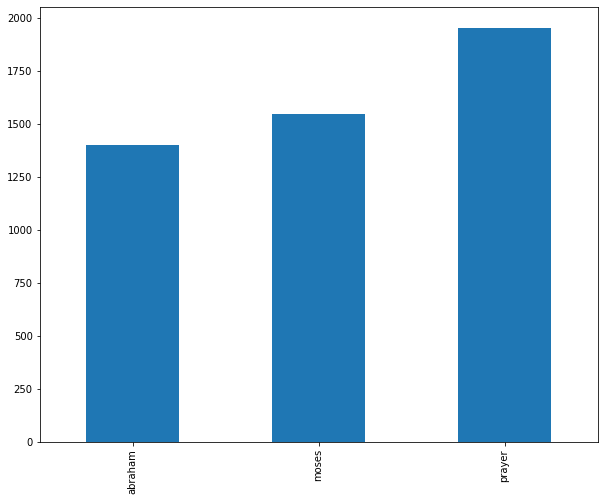

In [98]:
labels = df[topics]
labels.head(3)

import matplotlib as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

labels.sum(axis=0).plot.bar()

# from sklearn.preprocessing import MultiLabelBinarizer
# mlb = MultiLabelBinarizer()
# mlb.fit(df['Topics'])
# mlb.transform(df['Topics'])
# df.head()


In [0]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
import re

X = []
sentences = list(df["En"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = labels.values

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [106]:
for matrix_name, matrix in {
    'X_train':X_train, 
    'y_train':y_train, 
    'X_test':X_test, 
    'y_test':y_test
    }.items():
      print(matrix_name, matrix.shape)

X_train (5482, 200)
y_train (5482, 3)
X_test (1371, 200)
y_test (1371, 3)


In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/Colab Datasets/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


In [0]:
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras.layers import Flatten, LSTM
from keras.layers.core import Activation, Dropout, Dense
from keras.models import Model

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(3, activation='sigmoid')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [118]:
print(model.summary())


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 200, 100)          1379700   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 1,497,335
Trainable params: 117,635
Non-trainable params: 1,379,700
_________________________________________________________________
None


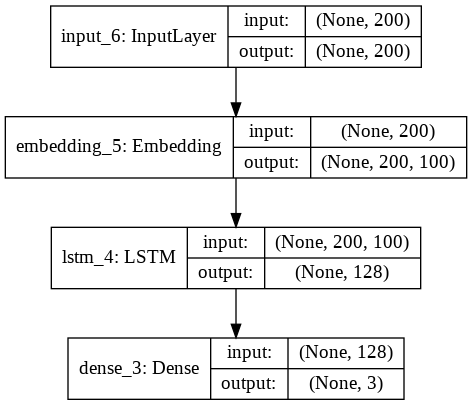

In [119]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)


In [120]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)


Train on 4385 samples, validate on 1097 samples
Epoch 1/5
4385/4385 [==============================] - 30s 7ms/step - loss: 0.5901 - acc: 0.7565 - val_loss: 0.5525 - val_acc: 0.7575
Epoch 2/5
4385/4385 [==============================] - 29s 7ms/step - loss: 0.5467 - acc: 0.7624 - val_loss: 0.5539 - val_acc: 0.7575
Epoch 3/5
4385/4385 [==============================] - 29s 7ms/step - loss: 0.5462 - acc: 0.7624 - val_loss: 0.5526 - val_acc: 0.7575
Epoch 4/5
4385/4385 [==============================] - 29s 7ms/step - loss: 0.5461 - acc: 0.7624 - val_loss: 0.5547 - val_acc: 0.7575
Epoch 5/5
4385/4385 [==============================] - 30s 7ms/step - loss: 0.5454 - acc: 0.7624 - val_loss: 0.5545 - val_acc: 0.7575


In [0]:
# prayer_df.sample(3)

In [0]:
# prayer_df['is_prayer'] = 'yes'
# prayer_df = prayer_df[['En','is_prayer']]

# prayer_df.tail(3)

In [0]:
# not_prayer_df.sample(3)

In [0]:
# not_prayer_df['is_prayer'] = 'no'
# not_prayer_df = not_prayer_df[['En','is_prayer']]
# not_prayer_df.sample(3)

In [0]:
# all_prayer_frames = [prayer_df, not_prayer_df]
# all_prayer_df = pd.concat(all_prayer_frames)
# all_prayer_df.reset_index(inplace=True)
# all_prayer_df=all_prayer_df.rename(columns = {'En':'english_text'})


# # all_prayer_df.style.set_properties({'align': 'right'})

# # all_prayer_df.tail(3)
# all_prayer_df.sample(5)
big_df.sample(5)
# # all_prayer_df.loc[[345]]

,index,english_text,is_prayer
273,273,"'××ª×§×¨× ×©× ×, the meaning of the words ...",yes
83,83,And Moses and Aaron went out from Pharaoh; and...,yes
1376,324,"And furthermore, if it should enter your mind ...",no
343,343,The Gemara relates another incident involving ...,yes
569,569,NaN,yes


In [0]:
del all_prayer_df['index']

all_prayer_df.sample(3)

,english_text,is_prayer
1980,NaN,no
217,NaN,yes
1342,MISHNA: All foods that became ritually impure ...,no


In [0]:
print("Before dropping duplicates",all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print("After dropping duplicates",all_prayer_df.shape)

print("\nNulls before dropping:",all_prayer_df.isnull().sum()[0])
all_prayer_df.dropna(inplace=True)
print("Nulls after dropping:",all_prayer_df.isnull().sum()[0])

# all_prayer_df.isnull().sum()
# all_prayer_df.sample(5)

Before dropping duplicates (2103, 2)
After dropping duplicates (1223, 2)

Nulls before dropping: 2
Nulls after dropping: 0


In [0]:
shape = all_prayer_df.shape
print(f"{shape[0]} rows and {shape[1]} columns")

1221 rows and 2 columns


In [0]:
all_prayer_df['is_prayer'] = all_prayer_df['is_prayer'].map({'no': 0, 'yes': 1})
all_prayer_df.sample(5)

,english_text,is_prayer
1340,"The Jewish neighbors came and spoke to Abaye, ...",0
996,The Gemara asks: Is that to say that one who r...,1
281,"And furthermore, Rabbi Yosei said: May my port...",1
1638,"When Jehoiakim came along and reigned, he said...",0
15,On the topic of prayers recited while travelin...,1


In [0]:
print('Prayer:', (all_prayer_df.is_prayer.values == 1).sum())
print('Not prayer:', (all_prayer_df.is_prayer.values == 0).sum())

Prayer: 553
Not prayer: 668


In [0]:
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')

# BAD_SYMBOLS_RE = re.compile('[^a-z #+_]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

# BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_ \b\d+\b]')
STOPWORDS = set(stopwords.words('english'))

def process_text(text):
    #  text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

# whitelist = set('abcdefghijklmnopqrstuvwxyz ZXCVBNMASDFGHJKLQWERTYUIOP')
# genres['movie_id'] = genres['movie_id'].astype(str)

# def process_text(text):
#     '''
#     1. Keep only letters and spaces
#     2. Remove stopwords
#     3. Return str of clean text words
#     '''
#     #1
#     chars_str = ''.join(filter(whitelist.__contains__, text))
#     #2
#     clean_words = [word.lower() for word in chars_str.split() if word.lower() not in stopwords.words('english')]
#     #3
#     return ' '.join(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
sample_text = '''aBC.!@#$%^&    c*(בחתו ‎‎‎ או‎ בקרחתו — une...
233 the gns: ac ...
1041    7. a pien p'''
process_text(sample_text)

'abc # c une233 gns ac 1041 7 pien p'

In [0]:
all_prayer_df.sample(5)

,english_text,is_prayer
1730,××¢×©××ª ××¨ ××× ×××¡××¨×ª× AND THOU...,0
528,JOY: The second [branch of love of G-d] is joy...,1
1465,(1) Sins between man and G-d only. For example...,0
1066,"But if its name must be á¸¥agav , one might ha...",0
1375,And the women said unto Naomi: âBlessed be t...,0


In [0]:
processed_df = all_prayer_df
processed_df['english_text'] = processed_df['english_text'].apply(process_text)
processed_df.head(5)

,english_text,is_prayer
0,another abba binyamins statements regard laws ...,1
1,taught baraita abba binyamin said ones prayer ...,1
2,additionally ravin bar rav adda said rabbi yit...,1
3,similarly taught baraita rabbi yishmael ben el...,1
4,meaning written let prayer unto lord time favo...,1


In [0]:
# all_prayer_df['En'] = all_prayer_df['En'].apply(stemming)
# all_prayer_df.head()
stemmed_df = processed_df
stemmed_df['english_text'] = stemmed_df['english_text'].apply(stemming)
stemmed_df.head()

,english_text,is_prayer
0,anoth abba binyamin statement regard law praye...,1
1,taught baraita abba binyamin said one prayer f...,1
2,addit ravin bar rav adda said rabbi yitzak sai...,1
3,similar taught baraita rabbi yishmael ben elis...,1
4,mean written let prayer unto lord time favor g...,1


In [0]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# prayer_words = ' '.join(list(all_prayer_df[stemmed_df['is_prayer'] == 1]['En']))
# prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
# plt.figure(figsize = (10, 8), facecolor = 'k')
# plt.imshow(prayer_wc)
# plt.axis('off')
# plt.tight_layout(pad = 0)
# plt.show()

In [0]:
# not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 0]['En']))
# not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
# plt.figure(figsize = (10, 8), facecolor = 'k')
# plt.imshow(not_prayer_wc)
# plt.axis('off')
# plt.tight_layout(pad = 0)
# plt.show()

In [0]:
df = stemmed_df
df.head()

,english_text,is_prayer
0,anoth abba binyamin statement regard law praye...,1
1,taught baraita abba binyamin said one prayer f...,1
2,addit ravin bar rav adda said rabbi yitzak sai...,1
3,similar taught baraita rabbi yishmael ben elis...,1
4,mean written let prayer unto lord time favor g...,1


In [0]:
from keras.preprocessing.sequence import pad_sequences
X = df['english_text']
# X = tokenizer.texts_to_sequences(df['english_text'].values)
# X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1221,)


In [0]:
Y = pd.get_dummies(df['is_prayer']).values
print('Shape of label tensor:', Y.shape)


Shape of label tensor: (1221, 2)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)


(1098,) (1098, 2)
(123,) (123, 2)


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', oov_token="<OOV>", lower=True)
tokenizer.fit_on_texts(X_train)
# tokenizer.fit_on_texts(df['english_text'].values)


In [0]:

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
# X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
# print('Shape of data tensor:', X.shape)
vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding="post", maxlen=maxlen)
X_test = pad_sequences(X_test, padding="post", maxlen=maxlen)


AttributeError: ignored

In [0]:


word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))



In [0]:
"""
function ConnectButton(){
    console.log("Connect pushed"); 
    document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click() 
}
setInterval(ConnectButton,60000);
"""

In [0]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers.core import Dense, SpatialDropout1D
# from tensorflow.python.keras.layers.recurrent import LSTM
from keras.layers.recurrent import LSTM

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='sigmoid'))
# model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
batch_size = 64

# history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


In [0]:
# X = df.english_text
# y = df.is_prayer
# print(f"Totals: {X.shape} / {y.shape}")

# from sklearn.model_selection import train_test_split

# # train, test = train_test_split(movies, random_state=42, test_size=0.30, shuffle=True)

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=56, test_size=0.20, shuffle=True)

# print(f"\nTrain: {X_train.shape} / {y_train.shape}")

# print(f"\nTest: {X_test.shape} / {y_test.shape}")

In [0]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

history = model.fit(X_train, Y_train, 
                    epochs=epochs, batch_size=batch_size,validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

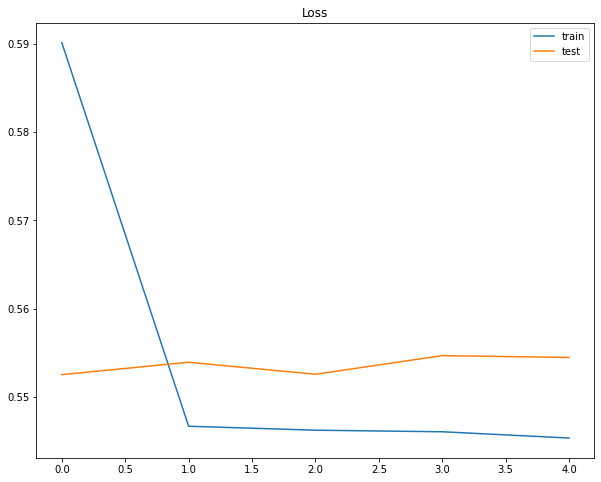

In [121]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();


In [123]:
model.metrics_names


['loss', 'acc']

KeyError: ignored

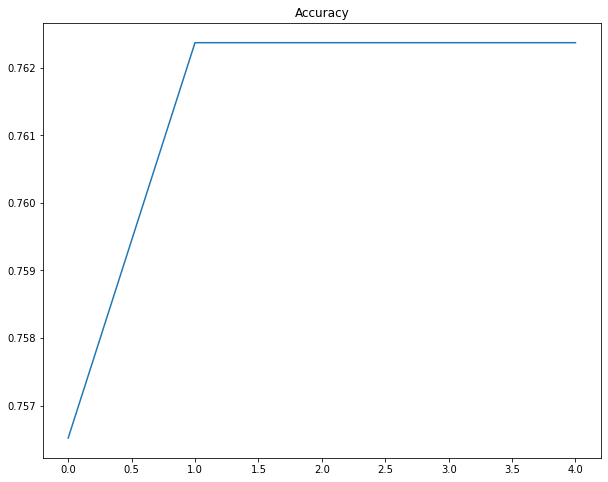

In [124]:
plt.title('Accuracy')
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();


In [129]:
new_complaint = ['I am a pray pray pray pray to open up .']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=maxlen)
# padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['moses','abraham','prayer']
print(pred, labels[np.argmax(pred)])

[[0.2507929  0.23649292 0.25338274]] prayer


In [0]:
# # Convert a collection of text documents to a matrix of token counts

# from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# # vectorizer = CountVectorizer(analyzer=process_text)
# # vectorizer = CountVectorizer(ngram_range=(2, 4))
# # vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
# vectorizer = TfidfVectorizer(
#     # strip_accents='unicode', 
#     # analyzer='word', 
#     ngram_range=(1,3), 
#     # norm='l2', 
#     # max_features = 15000
#     # max_features = 12000
#     max_features = 10000
#     # max_features = 8000
#     # max_features = 5000
#     )

# # vectorizer = TfidfVectorizer(ngram_range=(2, 4))
# # vectorizer.fit(X_train)
# # vectorizer.get_feature_names()


In [0]:
# print("Shape of document term matrix")

# # X_train_dtm = vectorizer.transform(X_train)
# X_train_dtm = vectorizer.fit_transform(X_train)
# print(f"Train: {X_train_dtm.shape}")

# # prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])
# X_test_dtm = vectorizer.transform(X_test)
# print(f"Test: {X_test_dtm.shape}")


In [0]:

# print(vectorizer.get_feature_names())


In [0]:
# from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB

# classifier = MultinomialNB()
# # classifier = ComplementNB()

# # for Gaussian need array format
# # X_train = X_train.toarray()
# # X_test = X_test.toarray()
# # classifier = GaussianNB()
# # classifier = BernoulliNB()

# %time classifier.fit(X_train_dtm, y_train)
# y_pred_class = classifier.predict(X_test_dtm)
# from sklearn import metrics

# print(f"\nBreakdown:\n{y_test.value_counts()[0]} non-prayer (0), and\n{y_test.value_counts()[1]} prayer (1)")

# null_accuracy = y_test.value_counts().head(1) / len(y_test)
# print(f'\nNull accuracy: {null_accuracy[0]}')

# non_prayer_passages = y_test.value_counts()[0]
# prayer_passages = y_test.value_counts()[1]
# print('Manual null accuracy:',(prayer_passages / (prayer_passages + non_prayer_passages)))

# print('\nAccuracy:',round(metrics.accuracy_score(y_test, y_pred_class),2))
# print('Precision:',round(metrics.precision_score(y_test, y_pred_class),2))
# print('Recall:',round(metrics.recall_score(y_test, y_pred_class),2))
# print('F1 score:',round(metrics.f1_score(y_test, y_pred_class),2))

# print("\nConfusion Matrix:")
# print(metrics.confusion_matrix(y_test, y_pred_class))


In [0]:

# from sklearn.model_selection import cross_val_score
# # clf = svm.SVC(kernel='linear', C=1)
# scores = cross_val_score(classifier, X, y, cv=5)
# scores


In [0]:
# TP = X_test[y_pred_class + y_test == 2]
# TN = X_test[y_pred_class + y_test == 0]
# FP = X_test[y_pred_class > y_test]
# FN = X_test[y_pred_class < y_test]

# pd.options.display.max_colwidth = 100

# # pd.style.set_properties(**{'text-align': 'left'})

# # print("\n*** TP ***")
# # print(TP.sample(5))
# # print("\n*** TN ***")
# # print(TN.sample(5))
# print("*** False Positives: Actually NOT prayer, but misclassified as prayer ***\n")
# print(FP.sample(10))
# print("\n\n*** False Negatives: Actually prayer, but misclassified as NOT prayer ***\n")
# print(FN.sample(10))

In [0]:
# FP.to_csv('FP', sep='\t', encoding='utf-8')
# FN.to_csv('FN', sep='\t', encoding='utf-8')
